# <font color='red'> [0] Build the model </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [58]:
from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

In [59]:
momo = model()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [0.3] Add of reaction and metabolite </font> 

In [60]:
momo.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}
momo.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, law = "", flux=1.0)

Don't worry, the metabolite will be add after the add of the 1st reaction
The metabolite "H2O" is already in the model !


In [61]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1.0


#### Add a reaction with specified metabolite and stoichiometric coefficient automaticaly adds them to the model

In [62]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0
O2,False,1.0


#### Print the stoichiometric matrix

In [63]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0
O2,-0.5


#### It is also possible to remove a metabolite or a reaction to the model

In [64]:
momo.metabolites.remove("O2")
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,True,1.0
H2,False,1.0


#### Removing a metabolite remove also every mention of it in the reactions dataframe and in the stoichiometric matrix

In [65]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
combustion,"{'H2O': 1.0, 'H2': -1.0}",1.0,,1.0


In [66]:
momo.Stoichio_matrix

,combustion
H2O,1.0
H2,-1.0


In [67]:
momo.reactions.remove(name="combustion")
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)


## <font color='green'> [0.4] Stoichiometric matrix from an existant one </font> 

In [68]:
reactions = {'Combustion': [1. , -1., -0.5],
            'Reaction_2': [0. ,  0.,   0. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

momo.Stoichio_matrix = dataframe

#### And the metabolites and reactions dataframes are automatically update

In [69]:
momo.Stoichio_matrix

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,0.0


In [70]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,,1
Reaction_2,{},1.0,,1


In [71]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
H2O,False,1
H2,False,1
O2,False,1


## <font color='green'> [0.5] Create a linear system </font> 

In [72]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


### Display the variables of the system

In [73]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


In [74]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


## <font color='green'> [0.6] Read a CSV file </font> 

In [75]:
momo.read_CSV()

In [76]:
momo.Stoichio_matrix

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3pg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6pgl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,0,0
succ,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,-1,-1,0,0,0,0,0
succ(e),0,0,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
succoa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## <font color='green'> [0.7] Read a SBML file </font> 

In [77]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


Here, a warning occurs because one of the metabolite of the refence state file isn't in the main SBML file ( "_S__Malate" insteed of "_S_Malate" )

In [78]:
momo.Stoichio_matrix

,PTS_RPTSsy,PGI_R02740,PFK_R04779,ALD_R01070,TIM_R01015,GAP_R01061,PGK_R01512,PGM_R01518,PGH_R00658,PYK_R00200,...,ACN_R01900,ICD_R00709,KGD_R08549,SCS_R00405,SDH_R02164,FUM_R01082,MDH_R00342,PPC_R00345,Overflow,OxAConsumption
D_Glucose,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phosphoenolpyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pyruvate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D_Glucose_6_phosphate,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_S_Malate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Acetyl_CoA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Fumarate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
cis_Aconitate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_6_Phospho_D_gluconate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orthophosphate,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# <font color='red'> [1] Play with the variables </font> 

In [79]:
momo.creat_linear(4)

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


## <font color='green'> [1.1] Display the data </font> 

### <font color='white'> [1.1.1] Display the stoichiometric matrix </font> 

In [80]:
momo.Stoichio_matrix

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


### <font color='white'> [1.1.2] Display the metabolite dataframe </font> 

In [81]:
momo.metabolites.df

,External,Concentration (mmol/gDW)
meta_0,True,1
meta_1,False,1
meta_2,False,1
meta_3,True,1


### <font color='white'> [1.1.3] Display the reactions dataframe </font> 

In [82]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


### <font color='white'> [1.1.4] Display the enzymes dataframe </font> 

In [83]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


### <font color='white'> [1.1.5] Display the elasticities matrices </font> 

In [84]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


In [85]:
momo.elasticity.p

,Temperature
reaction_0,0
reaction_1,0
reaction_2,0


### <font color='white'> [1.1.6] Display the enzymes dataframes </font> 

In [86]:
momo.enzymes.df

,Concentration / Activity,Reactions linked


## <font color='green'> [1.2] Enzymes </font> 

#### The enzyme dataframe is initially empty

### <font color='white'> [1.2.1] Add enzymes linked to each reactions </font> 

In [87]:
momo.enzymes.add_to_all_reaction()

In [88]:
momo.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


### <font color='white'> [1.2.1] Add a specific enzyme </font> 

In [89]:
momo.enzymes.add(name = "name_enzyme", mean = 1.0, reaction_linked = ["PTS_RPTSsy", "PGI_R02740", "PFK_R04779"])

### <font color='white'> [1.2.1] Remove a specific enzyme </font> 

In [90]:
momo.enzymes.remove(name = "name_enzyme")

But on this state, the enzymes hasn't any influence on our study, we have to consider our enzyme as a parameters to create a elasticity between it and flux

## <font color='green'> [1.3] Parameters </font> 

### Adding a new parameters automatcally update the E_p elasticiy matix by adding a new column

There is only the temperture by default in the parameters dataframe

In [91]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


### <font color='white'> [1.3.1] Add a specific parameter one by one </font> 

In [92]:
momo.parameters.add(name = "name_parameter", mean = 1.0, Standard_deviation = 0.5)

### <font color='white'> [1.3.2] Removing a specific parameter </font> 

In [93]:
momo.parameters.remove(name = "name_parameter")

### <font color='white'> [1.3.3] Add every externals metabolite as parameters </font> 

In [94]:
momo.parameters.add_externals()

In [95]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0


##### And the enzymes too

### <font color='white'> [1.3.4] Add every enzymes as parameters </font> 

In [96]:
momo.parameters.add_enzymes()

In [97]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [1.4] Elasticities </font> 

#### When the .add_externals() and .add_enzymes() are call, it automatically add default values considering the link in the dataframe

In [98]:
momo.elasticity.p

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0,0.5,0.0,1.0,0.0,0.0
reaction_1,0,0.0,0.0,0.0,1.0,0.0
reaction_2,0,0.0,-0.5,0.0,0.0,1.0


In [99]:
momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0,0,0,0
reaction_1,0,0,0,0
reaction_2,0,0,0,0


#### We can add default value to the E_s matrix too

In [100]:
momo.elasticity.half_satured()

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-0.0,0.5,-0.5,-0.0
reaction_2,-0.0,-0.0,0.5,-0.5


### To modify an elestacity coefficient, use the Pandas paradigme.

In [101]:
momo.elasticity.s.at["reaction_2", "meta_0"] = 2
momo.elasticity.s.loc["reaction_1"] = [-1 for i in range(momo.elasticity.s.shape[1])]

momo.elasticity.s

,meta_0,meta_1,meta_2,meta_3
reaction_0,0.5,-0.5,-0.0,-0.0
reaction_1,-1.0,-1.0,-1.0,-1.0
reaction_2,2.0,-0.0,0.5,-0.5


# <font color='red'> [2] Post-simulation analysis </font> 

## <font color='green'> [2.0] Accessing the MCA coefficient </font> 

In [102]:
momo.Jacobian

,meta_0,meta_1,meta_2,meta_3
meta_0,-0.5,0.5,0.0,0.0
meta_1,1.5,0.5,1.0,1.0
meta_2,-3.0,-1.0,-1.5,-0.5
meta_3,2.0,0.0,0.5,-0.5


In [103]:
momo.R

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_0,-0.0,-1.666667e-01,1.666667e-01,-3.333333e-01,8.333333e-02,-3.333333e-01
meta_1,-0.0,8.333333e-01,1.666667e-01,1.666667e+00,8.333333e-02,-3.333333e-01
meta_2,-0.0,-2.775558e-17,-0.000000e+00,-5.551115e-17,2.500000e-01,-0.000000e+00
meta_3,-0.0,-6.666667e-01,-3.333333e-01,-1.333333e+00,5.833333e-01,6.666667e-01
reaction_0,0.0,1.665335e-16,-5.551115e-17,3.330669e-16,1.387779e-17,1.110223e-16
reaction_1,0.0,-2.220446e-16,-5.551115e-17,-4.440892e-16,4.440892e-16,1.110223e-16
reaction_2,0.0,1.665335e-16,-1.665335e-16,3.330669e-16,0.000000e+00,3.330669e-16


## <font color='green'> [2.1] Correlation and Mutual Information </font> 

### <font color='white'> [2.1.0] Correlation </font> 

In [104]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
meta_0_para,0.0,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.312348,0.438108,-1.110223e-16,-0.377543,0.423999,-0.327693,3.162278e-01
meta_3_para,0.0,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.312348,0.087622,0.000000e+00,-0.188772,-0.141333,-0.081923,-3.162278e-01
enzyme_reaction_0_para,0.0,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,-0.624695,0.876216,-2.220446e-16,-0.755087,0.847998,-0.655386,6.324555e-01
enzyme_reaction_1_para,0.0,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.156174,0.043811,1.000000e+00,0.330350,0.035333,0.655386,0.000000e+00
enzyme_reaction_2_para,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,-0.624695,-0.175243,0.000000e+00,0.377543,0.282666,0.163846,6.324555e-01
meta_0,0.0,-3.123475e-01,0.312348,-6.246950e-01,0.156174,-0.624695,1.000000,-0.540526,1.561738e-01,0.346404,-0.877382,0.486182,-9.877296e-01
meta_1,0.0,4.381080e-01,0.087622,8.762159e-01,0.043811,-0.175243,-0.540526,1.000000,4.381080e-02,-0.895253,0.868416,-0.725002,5.541676e-01
meta_2,0.0,-1.110223e-16,0.000000,-2.220446e-16,1.000000,0.000000,0.156174,0.043811,1.000000e+00,0.330350,0.035333,0.655386,-1.755417e-16
meta_3,0.0,-3.775433e-01,-0.188772,-7.550867e-01,0.330350,0.377543,0.346404,-0.895253,3.303504e-01,1.000000,-0.655320,0.912422,-2.984742e-01


### <font color='white'> [2.1.1] Mutual information </font> 

In [105]:
momo.rho()

,Temperature,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_1,meta_2,meta_3,reaction_0,reaction_1,reaction_2
Temperature,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
meta_0_para,0.0,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.312348,0.438108,-1.110223e-16,-0.377543,0.423999,-0.327693,3.162278e-01
meta_3_para,0.0,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.312348,0.087622,0.000000e+00,-0.188772,-0.141333,-0.081923,-3.162278e-01
enzyme_reaction_0_para,0.0,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,-0.624695,0.876216,-2.220446e-16,-0.755087,0.847998,-0.655386,6.324555e-01
enzyme_reaction_1_para,0.0,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.156174,0.043811,1.000000e+00,0.330350,0.035333,0.655386,0.000000e+00
enzyme_reaction_2_para,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,-0.624695,-0.175243,0.000000e+00,0.377543,0.282666,0.163846,6.324555e-01
meta_0,0.0,-3.123475e-01,0.312348,-6.246950e-01,0.156174,-0.624695,1.000000,-0.540526,1.561738e-01,0.346404,-0.877382,0.486182,-9.877296e-01
meta_1,0.0,4.381080e-01,0.087622,8.762159e-01,0.043811,-0.175243,-0.540526,1.000000,4.381080e-02,-0.895253,0.868416,-0.725002,5.541676e-01
meta_2,0.0,-1.110223e-16,0.000000,-2.220446e-16,1.000000,0.000000,0.156174,0.043811,1.000000e+00,0.330350,0.035333,0.655386,-1.755417e-16
meta_3,0.0,-3.775433e-01,-0.188772,-7.550867e-01,0.330350,0.377543,0.346404,-0.895253,3.303504e-01,1.000000,-0.655320,0.912422,-2.984742e-01


### <font color='white'> [2.1.2] Plot </font> 

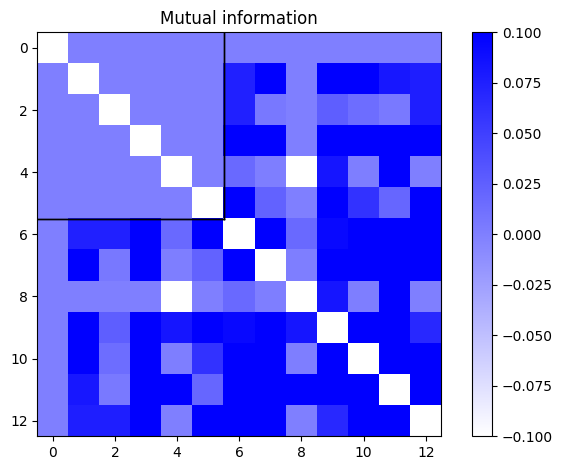

In [106]:
momo.plot(result="MI", label=False, value_in_cell=False )

## <font color='green'> [2.2] Sampling </font> 

### <font color='white'> [2.2.0] Let's create an exemple </font> 

In [107]:
momo.read_SBML()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
0 error detected in your SBML file


In [108]:
momo.enzymes.add_to_all_reaction()
momo.parameters.add_externals()
momo.parameters.add_enzymes()

In [109]:
print(f"Shape of the stoichio matrix : {momo.Stoichio_matrix.shape} \n")
print(f"numbers of metabolite in the model : {momo.metabolites.len} \n")
print(f"Numbers of reaction in the model : {momo.reactions.len} \n")
print(f"Numbers of enzyme in the model : {momo.enzymes.df.shape[0]} \n")
print(f"Numbers of parameters in the model : {momo.parameters.df.shape[0]} \n")

Shape of the stoichio matrix : (40, 31) 

numbers of metabolite in the model : 40 

Numbers of reaction in the model : 31 

Numbers of enzyme in the model : 31 

Numbers of parameters in the model : 32 



In [110]:
momo.elasticity.half_satured()

### <font color='white'> [2.2.1] Updating the dataframe of the sampling data </font> 

In [111]:
momo.data_sampling

,Name,Type,Mean,Standard deviation,Distribution


In [112]:
momo.add_sampling_data(["PTS_RPTSsy","enzyme_PTS_RPTSsy_para"], "elasticity_p", mean = True)

momo.data_sampling

,Name,Type,Mean,Standard deviation,Distribution
0,"[PTS_RPTSsy, enzyme_PTS_RPTSsy_para]",elasticity_p,1.0,1,uniform


### <font color='white'> [2.2.2] Launching the sampling loop </font> 

In [117]:
momo.sampling(100, result="rho", seed_constant=False)

running tiem of the code : 3.1273884773254395 
So 0.03127388477325439 per occurences !


array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.07204674,
        -0.03209286,  0.0222516 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.15025327,
         0.11923647,  0.27386831],
       ...,
       [ 0.        ,  0.07204674, -0.15025327, ...,  1.        ,
        -0.03059932, -0.37545494],
       [ 0.        , -0.03209286,  0.11923647, ..., -0.03059932,
         1.        ,  0.17571049],
       [ 0.        ,  0.0222516 ,  0.27386831, ..., -0.37545494,
         0.17571049,  1.        ]])

In [114]:
momo.MI([["enzyme_PTS_RPTSsy_para","enzyme_PGI_R02740_para"],["FUM_R01082","MDH_R00342"],["PPC_R00345"]])

,0,1,2
0,inf,0.156032,0.019534
1,0.156032,inf,0.090595
2,0.019534,0.090595,inf


/tmp/ipykernel_21965/3807011854.py:17: RuntimeWarning: divide by zero encountered in divide
  pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
/tmp/ipykernel_21965/3807011854.py:17: RuntimeWarning: divide by zero encountered in log
  pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
/tmp/ipykernel_21965/3807011854.py:17: RuntimeWarning: invalid value encountered in multiply
  pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))


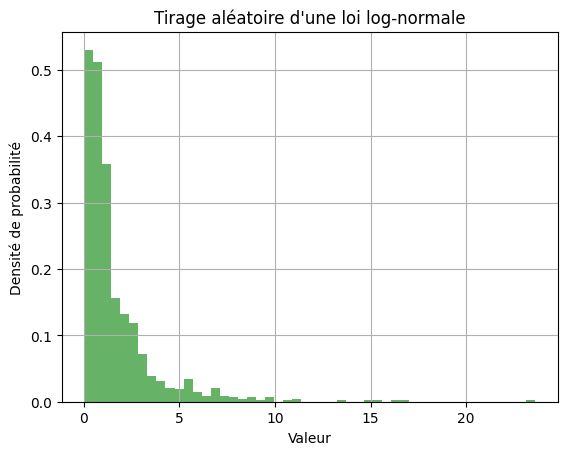

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la distribution log-normale
mu = 0  # Moyenne
sigma = 1  # Écart-type

# Générer un échantillon de taille n
n = 1000  # Vous pouvez ajuster la taille de l'échantillon selon vos besoins
echantillon = np.random.lognormal(mu, sigma, n)

# Tracer l'histogramme de l'échantillon
plt.hist(echantillon, bins=50, density=True, alpha=0.6, color='g')

# Afficher la densité de probabilité théorique
x = np.linspace(0, 8, 1000)
pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
plt.plot(x, pdf, 'r-', lw=2)

plt.xlabel('Valeur')
plt.ylabel('Densité de probabilité')
plt.title('Tirage aléatoire d\'une loi log-normale')
plt.grid(True)
plt.show()